# Fake News Detection

This project aims to build and evaluate machine learning models to detect fake news articles based on textual features.

##  Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np

##  Loading the Dataset

Two datasets are used — one containing real news articles and the other fake news articles. We will load and inspect them before preprocessing.

In [3]:
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


##  Creating a New Column: `class`

We assign a target label to each dataset: `1` for real news and `0` for fake news. This enables supervised classification.

In [6]:
true["class"] = 1
fake["class"] = 0

In [7]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   class    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [8]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


##  Separating Data for Manual Testing

A few observations from each class are held out for manual testing after training the models.

In [9]:
true_sample = true.sample(n=5, random_state = 44)
true.drop(true_sample.index, inplace= True)

In [10]:
fake_sample = fake.sample(n=5, random_state = 42)
fake.drop(fake_sample.index, inplace= True)

In [11]:
true_sample.reset_index(inplace= True)
true_sample.drop(columns=['index'], inplace= True)

In [11]:
true_sample

,title,text,subject,date,class
0,Ukraine's Poroshenko vows to work for quick ex...,BERLIN (Reuters) - Ukrainian President Petro P...,worldnews,"December 22, 2017",1
1,China considers three-year jail terms for disr...,BEIJING (Reuters) - China s largely rubber-sta...,worldnews,"October 31, 2017",1
2,Malaysia asks Interpol to trace financier link...,KUALA LUMPUR (Reuters) - Malaysia has asked In...,worldnews,"October 23, 2017",1
3,"Euro budget, ESM, banking union stances unreso...",BERLIN (Reuters) - German parties exploring a ...,worldnews,"November 10, 2017",1
4,Trump floats idea of using NATO in fight again...,WASHINGTON - Republican Donald Trump said on T...,politicsNews,"June 30, 2016",1


In [12]:
fake_sample.reset_index(inplace=True)
fake_sample.drop(columns=["index"], inplace = True)

In [13]:
fake_sample

,title,text,subject,date,class
0,ABOUT HILLARY’S COUGH: We Discovered The Secre...,,politics,"Jul 20, 2016",0
1,BREAKING: OBAMACARE REPEAL Clears First Hurdle...,The Senate voted 51-48 this afternoon to proce...,politics,"Jan 4, 2017",0
2,‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Sa...,So much for the SCOTUS not being political Che...,left-news,"Feb 7, 2017",0
3,WATCH: Kellyanne Conway Very Upset Hillary Cl...,White House counselor Kellyanne Conway crawled...,News,"August 24, 2017",0
4,"GOP Gives Trump The Middle Finger, Prepares T...",Donald Trump may have decided that Russia is g...,News,"December 9, 2016",0


## Merging the Real and Fake Datasets

We combine both datasets into a single DataFrame to simplify preprocessing and modeling.

In [13]:
df = pd.concat([true, fake], axis= 0)
df

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


### Shuffling the Dataset

Shuffling ensures a random mix of fake and real news to prevent order-based biases.

In [14]:
df = df.sample(frac= 1)
df.head()

,title,text,subject,date,class
10092,State Department says halts review of Clinton ...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"April 1, 2016",1
3072,Jeff Sessions Lies Through His Teeth In Openi...,"Alabama Senator Jeff Sessions, who is Donald T...",News,"January 10, 2017",0
14213,LIBERAL “The View” HOSTS MOCK HILLARY’S RESPON...,Hell begins freeze over Did We Ever Think That...,politics,"Mar 24, 2016",0
11047,PRESIDENT TRUMP Hits Back At Activist Judge On...,Judge Orrick in California ruled against Presi...,politics,"Apr 26, 2017",0
16630,BRILLIANT! Why “Democratic” Socialism Doesn’t ...,This is Stephen Crowder at his best So smart a...,Government News,"Apr 30, 2016",0


In [15]:
df.reset_index(inplace=True)
df.drop(columns= ["index"], inplace = True)

In [16]:
df.head(10)

,title,text,subject,date,class
0,State Department says halts review of Clinton ...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"April 1, 2016",1
1,Jeff Sessions Lies Through His Teeth In Openi...,"Alabama Senator Jeff Sessions, who is Donald T...",News,"January 10, 2017",0
2,LIBERAL “The View” HOSTS MOCK HILLARY’S RESPON...,Hell begins freeze over Did We Ever Think That...,politics,"Mar 24, 2016",0
3,PRESIDENT TRUMP Hits Back At Activist Judge On...,Judge Orrick in California ruled against Presi...,politics,"Apr 26, 2017",0
4,BRILLIANT! Why “Democratic” Socialism Doesn’t ...,This is Stephen Crowder at his best So smart a...,Government News,"Apr 30, 2016",0
5,MSNBC Host Can’t Help But Be Perfectly Sexist...,Tuesday night was a very big night for Democra...,News,"March 16, 2016",0
6,Supreme Court standoff looms over Republicans'...,WASHINGTON (Reuters) - Republicans’ refusal to...,politicsNews,"March 1, 2016",1
7,Male Republican Blames ‘Female Senators’ For ...,A Texas Republican congressman blamed female R...,News,"July 24, 2017",0
8,Clinton sole presidential hopeful to attend As...,NEW YORK (Reuters) - U.S. Democrat Hillary Cli...,politicsNews,"April 27, 2016",1
9,Russia says U.S. Iran sanctions undermine nucl...,UNITED NATIONS (Reuters) - U.S. unilateral san...,worldnews,"September 21, 2017",1


## Cleaning and Preparing the Text Data

News text is cleaned using NLP techniques to prepare for model input.

### Importing Text Preprocessing Libraries

In [17]:
import re
from bs4 import BeautifulSoup
import warnings
from bs4 import MarkupResemblesLocatorWarning

# Suppress the specific warning raised by BeautifulSoup
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

### Defining the `clean_text` Function

This function removes punctuation, stopwords, and performs basic normalization.

In [18]:
def clean_text(text):
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove URLs using regex
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove any non-alphanumeric characters, except spaces
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44888 entries, 0 to 44887
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44888 non-null  object
 1   text     44888 non-null  object
 2   subject  44888 non-null  object
 3   date     44888 non-null  object
 4   class    44888 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [20]:
df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

### Creating a New Column: `content`

The `title` and `text` are merged into a single `content` field used for modeling.

In [21]:
df['content'] = df['title'].str.upper() + ": " + df['text']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44888 entries, 0 to 44887
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44888 non-null  object
 1   text     44888 non-null  object
 2   subject  44888 non-null  object
 3   date     44888 non-null  object
 4   class    44888 non-null  int64 
 5   content  44888 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


### Dropping Unnecessary Columns

Irrelevant columns (in context of our analysis) like `title`, `text`, and `date` are dropped.

In [22]:
df.drop(columns=['title', 'text','subject','date'], inplace = True)
df.head()

,class,content
0,1,STATE DEPARTMENT SAYS HALTS REVIEW OF CLINTON ...
1,0,JEFF SESSIONS LIES THROUGH HIS TEETH IN OPENIN...
2,0,LIBERAL THE VIEW HOSTS MOCK HILLARYS RESPONSE ...
3,0,PRESIDENT TRUMP HITS BACK AT ACTIVIST JUDGE ON...
4,0,BRILLIANT WHY DEMOCRATIC SOCIALISM DOESNT WORK...


## Exploratory Data Analysis

Visualize and understand class distribution and textual characteristics.

### Class Distribution

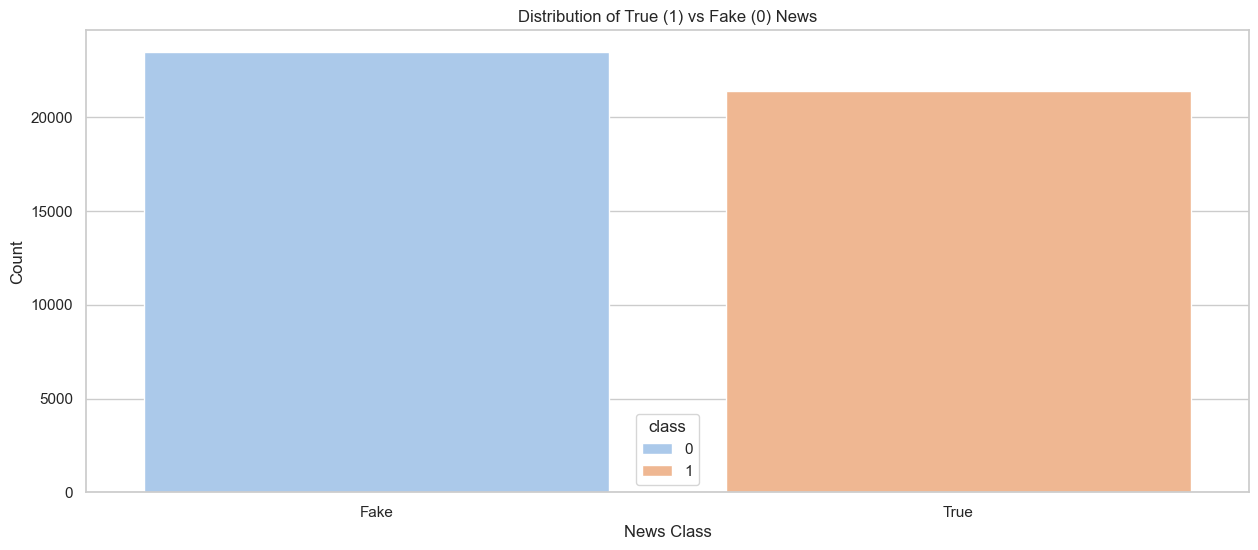

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot class balance
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='class', hue = 'class', palette='pastel')
plt.title("Distribution of True (1) vs Fake (0) News")
plt.xlabel("News Class")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Fake', 'True'])
plt.show()

### Word Count Distribution

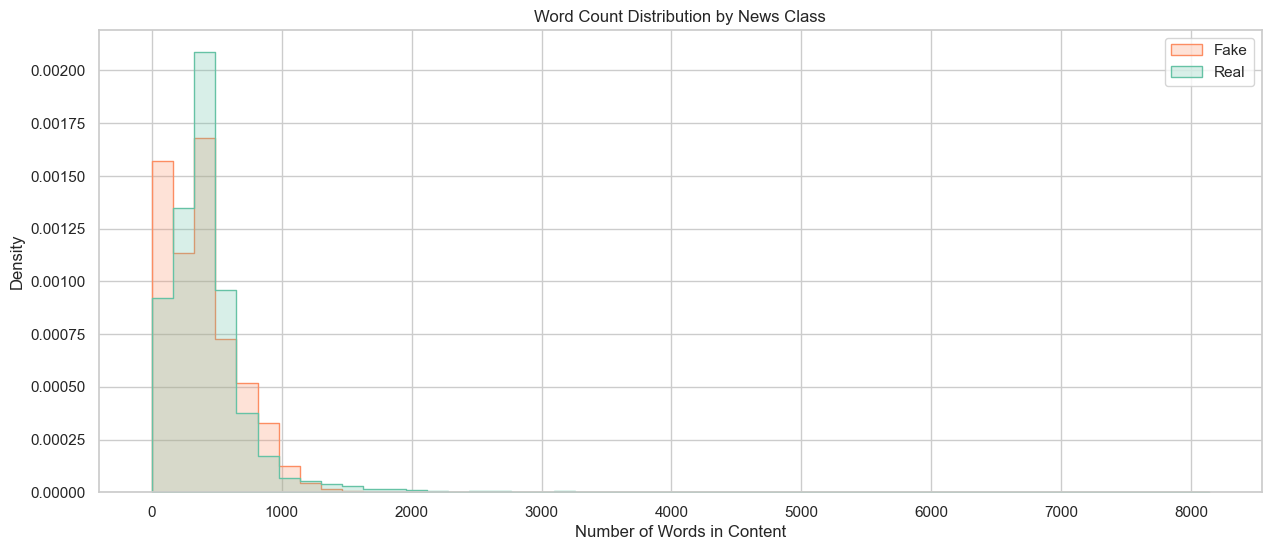

In [26]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='word_count', bins=50, hue='class', element='step', stat='density', common_norm=False, palette='Set2')
plt.title("Word Count Distribution by News Class")
plt.xlabel("Number of Words in Content")
plt.ylabel("Density")
plt.legend(labels=['Fake', 'Real'])
plt.show()

## Model Specification

### Importing Necessary libraries

In [27]:
from sklearn.model_selection import train_test_split # to Split Training and Testing
from sklearn.feature_extraction.text import TfidfVectorizer # To Convert text to vectors

### Defining Features and Labels

In [28]:
X = df['content']
y = df['class']

### Train - Test Split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

### Text Vectorization (TF-IDF)

Converts text into numerical vectors for model training.

In [30]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Model Training

Multiple classifiers are trained and evaluated.

### Logestic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

LR_model = LogisticRegression()
LR_model.fit(X_train_tfidf, y_train)

# Predictions
LR_pred = LR_model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, LR_pred))
print("\nClassification Report:\n", classification_report(y_test, LR_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, LR_pred))

Accuracy: 0.9881933615504567

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4263

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978


Confusion Matrix:
 [[4658   57]
 [  49 4214]]


### Multinomial Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

#Predictions
nb_pred = nb_model.predict(X_test_tfidf)

#Evaluation
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nb_pred))

Accuracy: 0.9490977946090443

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      4715
           1       0.94      0.95      0.95      4263

    accuracy                           0.95      8978
   macro avg       0.95      0.95      0.95      8978
weighted avg       0.95      0.95      0.95      8978


Confusion Matrix:
 [[4459  256]
 [ 201 4062]]


### Support Vector Machine (Linear SVC)

In [35]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

#Predictions
svm_pred = svm_model.predict(X_test_tfidf)

#Evaluation
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))

Accuracy: 0.9969926486968145

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4715
           1       1.00      1.00      1.00      4263

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978


Confusion Matrix:
 [[4699   16]
 [  11 4252]]


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

#Predictions
rf_pred = rf_model.predict(X_test_tfidf)

#Evaluation
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Accuracy: 0.991869013143239

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4263

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978


Confusion Matrix:
 [[4674   41]
 [  32 4231]]


### Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)

#Predictions
gb_pred = gb_model.predict(X_test_tfidf)

#Evaluation
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gb_pred))

Accuracy: 0.9948763644464246

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4715
           1       0.99      1.00      0.99      4263

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978


Confusion Matrix:
 [[4681   34]
 [  12 4251]]


## Testing on Manual Samples

Evaluate models on hand-picked samples.

### Preparing Manual Test Samples

In [36]:
# Manual samples: true_sample and fake_sample (5 each)
manual_test = pd.concat([true_sample, fake_sample], axis=0).reset_index(drop=True)

# Clean and preprocess
manual_test['text'] = manual_test['text'].apply(clean_text)
manual_test['title'] = manual_test['title'].apply(clean_text)
manual_test['content'] = manual_test['title'].str.upper() + ": " + manual_test['text']

# TF-IDF transform
manual_X = vectorizer.transform(manual_test['content'])

# True labels
manual_y = [1] * 5 + [0] * 5

### Predict and Display Results from All Models

In [40]:
models = {
    "Logestic Regression": LR_model,
    "Naive Bayes": nb_model,
    "Linear Support Vector Machine": svm_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

print("Manual Sample Prediction Results:\n")

for name, model in models.items():
    manual_pred = model.predict(manual_X)
    print(f"🔍 MODEL: {name}")
    print("Predicted:", manual_pred.tolist())
    print("Actual:   ", manual_y)
    print("Accuracy: {:.2f}".format(accuracy_score(manual_y, manual_pred)))
    #print("Classification Report:\n", classification_report(manual_y, manual_pred, zero_division=0))
    print("-" * 60)


Manual Sample Prediction Results:

🔍 MODEL: Logestic Regression
Predicted: [1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
Actual:    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Accuracy: 0.90
------------------------------------------------------------
🔍 MODEL: Naive Bayes
Predicted: [1, 1, 1, 1, 1, 0, 1, 0, 0, 1]
Actual:    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Accuracy: 0.80
------------------------------------------------------------
🔍 MODEL: Linear Support Vector Machine
Predicted: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Actual:    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Accuracy: 1.00
------------------------------------------------------------
🔍 MODEL: Random Forest
Predicted: [1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
Actual:    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Accuracy: 0.90
------------------------------------------------------------
🔍 MODEL: Gradient Boosting
Predicted: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Actual:    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Accuracy: 0.90
------------------------------------------------------------
